In [3]:
#Importamos los módulos y librerías que vamos a necesitar
#!/usr/bin/env python -W ignore::DeprecationWarning
#!/usr/bin/env python -W ignore::FutureWarning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

from patsy import dmatrices
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
#Cargamos los datos
dta = sm.datasets.fair.load_pandas().data
dta.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [7]:
#Información sobre el dataset: descripción general, origen, 
#definición de variables,tipo de variables

print(sm.datasets.fair.NOTE)
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.DESCRLONG)

dta.info()

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [8]:
#Comprobamos que no falten datos (Resultado booleano: true=falta dato, false=dato)
#También se puede visualizar si faltan datos con los mapas de calor de seaborn.
#En este caso, no hace falta.

dta.isnull().head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [9]:
# Veamos ahora la matriz de correlación. 
# Deberíamos eliminar las variables altamente correlacionadas >0,90
# Edad, años matrimonio-- lógica
# Correlación positiva--religious/rate marriage,age/yrs_marriage
# Correlación negativa: affairs/children, religious

print(dta.corr())

#Edad, años matrimonio-- lógicamente no son independientes, para eliminarlos habría que hacer:
#dta.drop(['age','yrs_married'],axis=1,inplace=True)
#dta.head()

                 rate_marriage       age  yrs_married  children  religious  \
rate_marriage         1.000000 -0.111127    -0.128978 -0.129161   0.078794   
age                  -0.111127  1.000000     0.894082  0.673902   0.136598   
yrs_married          -0.128978  0.894082     1.000000  0.772806   0.132683   
children             -0.129161  0.673902     0.772806  1.000000   0.141845   
religious             0.078794  0.136598     0.132683  0.141845   1.000000   
educ                  0.079869  0.027960    -0.109058 -0.141918   0.032245   
occupation            0.039528  0.106127     0.041782 -0.015068   0.035746   
occupation_husb       0.027745  0.162567     0.128135  0.086660   0.004061   
affairs              -0.178068 -0.089964    -0.087737 -0.070278  -0.125933   

                     educ  occupation  occupation_husb   affairs  
rate_marriage    0.079869    0.039528         0.027745 -0.178068  
age              0.027960    0.106127         0.162567 -0.089964  
yrs_married     -0

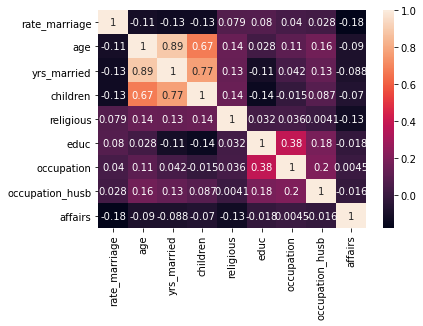

In [10]:
#También podemos ver la matriz de correlación de forma gráfica
#Si los coeficientes son muy bajos, significa que la influencia 
#de esa variable es muy pequeña y,podríamos plantearnos una "reducción" 
#de estas para simplifacar el modelo, pero en este ejemplo no vamos a
#quitar ninguna

%matplotlib inline
sns.heatmap(dta.corr(), annot=True)

Text(0, 0.5, 'Frecuencia infidelidad')

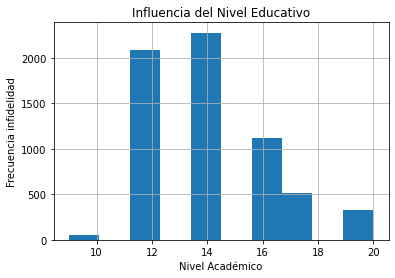

In [11]:
#En la fase de exploración, podemos visualizar las variables y 
#sus relaciones mediante histogramas

#Para que muestre los gráficos en el notebook añadimos:
%matplotlib inline

# histograma sobre influencia del nivel educativo
dta.educ.hist()
plt.title('Influencia del Nivel Educativo')
plt.xlabel('Nivel Académico')
plt.ylabel('Frecuencia infidelidad')

In [12]:
# Creamos una nueva variable binaria "infidelity" para tratarlo
#como un problema de clasificación 0=fiel, 1=infiel
# Mostramos los 10 primeros ... infieles

dta['infidelity'] = (dta.affairs > 0).astype(int)
print(dta.head(10))
dta.shape

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   
5            4.0  27.0          9.0       0.0        2.0  14.0         3.0   
6            5.0  37.0         23.0       5.5        2.0  12.0         5.0   
7            5.0  37.0         23.0       5.5        2.0  12.0         2.0   
8            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
9            3.0  27.0          6.0       0.0        1.0  16.0         3.0   

   occupation_husb   affairs  infidelity  
0              5.0  0.111111           1  
1              4.0  3.230769           1  
2           

(6366, 10)

In [17]:
#Patsy es una librería de Python que permite convertir los datos 
#en el formato de matriz necesario para aplicar el modelo
#También permite generar variables dummy mediante la función C()
#La sintaxis es:

#patsy.dmatrix(formula_like, data={}, eval_env=0, NA_action='drop', return_type='matrix')

from patsy import dmatrices

y, X = dmatrices('infidelity ~ rate_marriage + age +  yrs_married + children + religious+ educ + C(occupation) + C(occupation_husb) ', dta, return_type = 'dataframe')

#Comprobamos las dimensiones y los índices de las matrices resultado
print(X.shape)
print(y.shape)
print (X.columns)
print(y.columns)
(6366, 17)
(6366, 1)

(6366, 17)
(6366, 1)
Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')
Index(['infidelity'], dtype='object')


(6366, 1)

In [18]:
#Para que scikit-learn entienda y como variable dependiente (target)
#debemos convertirla de vector columna en matriz 1D
y=np.ravel(y)
print(y)

# sklearn output
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_


[1. 1. 1. ... 0. 0. 0.]


c:\users\mario argueta\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 2.60210235,  0.30548066,  0.65129988,  0.3886458 ,  0.99294935,
         0.57291652,  0.46623423,  0.60732271,  0.46285358,  0.48174353,
         0.54719168, -0.70361504, -0.06221826,  0.10819748,  0.01605812,
        -0.37018928,  0.00686971]])

In [20]:
# Veamos la precisión del modelo (sobre los datos de entrenamiento) 73%
# Más adelante volveremos a entrenar el modelo, pero separando antes los
# datos en train y test. Volveremos a calcular la precisión del modelo
# entrenado sobre los datos train al aplicarlo a los test

model.score(X,y)


0.7252591894439209

In [21]:
#¿Qué porcentaje tiene aventuras?: 32%-- 
#Si predecimos siempre "no", acertaríamos el 68% de las veces,
#algo mejor que el error nulo pero no mucho

y.mean()

0.3224945020420987

In [22]:
# Podemos examinar la matriz de coeficientes, para ver qué peso tiene
# cada uno de los coeficientes. List(zip) permite crear una matriz
# a partir de dos listas, el nombre de los índices, en la primera columna
# y en la segunda, los valores
#pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_)))

pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

# Por ejemplo, los incrementos en rate_marrige y religiousnes disminuyen 
# la probabilidad de infidelidad (coefientes negativos)

,0,1
0,Intercept,[2.602102347635381]
1,C(occupation)[T.2.0],[0.3054806631196076]
2,C(occupation)[T.3.0],[0.6512998799222014]
3,C(occupation)[T.4.0],[0.38864579686674783]
4,C(occupation)[T.5.0],[0.9929493495238981]
5,C(occupation)[T.6.0],[0.5729165227096745]
6,C(occupation_husb)[T.2.0],[0.46623423100484285]
7,C(occupation_husb)[T.3.0],[0.6073227050322935]
8,C(occupation_husb)[T.4.0],[0.46285358103803076]
9,C(occupation_husb)[T.5.0],[0.48174352976510454]


In [23]:
# Para evaluar el modelo, dividimos el dataset en dos partes
# un 75% de los datos para entrenar el modelo
# y el 25% restante para evaluarlo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Ahora, aplicamos el modelo sobre los datos reservados para entrenamiento "train"

model2 = LogisticRegression()
model2.fit(X_train, y_train)

c:\users\mario argueta\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Una vez entrenado el modelo, lo aplicamos a los datos reservados para "test"

predicted = model2.predict(X_test)
print (predicted)

# Generamos las métricas de evaluación 
# Cuidado con los "false friends"
# "Accuracy" es la precisión, y "Precision" es la exactitud

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))

# Generamos la matriz de confusión

cnf_matrix = metrics.confusion_matrix(y_test, predicted)
cnf_matrix

[1. 0. 0. ... 0. 1. 1.]
Accuracy: 0.7355527638190955
Precision: 0.6272401433691757


array([[996, 104],
       [317, 175]], dtype=int64)

In [25]:
#Podemos visualizarla con un mapa de calor
#Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
#In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.


#The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.
#We can also see the confusion matrix and a classification report with other metrics.

Text(0.5, 257.44, 'Predicted label')

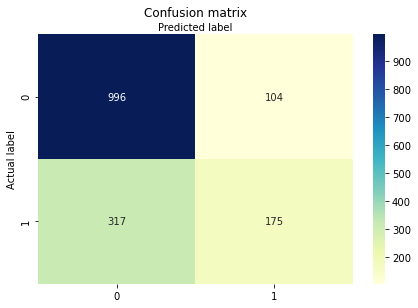

In [26]:
# Importamos los módulos necesarios

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creamos un mapa de calor

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
# Vamos a usar el modelo para hacer una predicción

# Para que nos resulta más fácil "escribir" los datos de entrada, 
# vamos a sacar un ejemplo de uno de los registros de la matriz de 
# datos, por ejemplo, el 4º, y después lo usaremos de base para 
# introducir en el modelo los datos que querarmos.

print(X.iloc[4])
F=X.iloc[4]
F.shape

#Con reshape(1,-1) indicamos que lo convierta en una matriz de 1 fila y 
#el número de columnas que corresponda para que la nueva forma sea  
#compatible con la original

F.values.reshape(1,-1)
model.predict_proba(F.values.reshape(1, -1))

Intercept                     1.0
C(occupation)[T.2.0]          0.0
C(occupation)[T.3.0]          1.0
C(occupation)[T.4.0]          0.0
C(occupation)[T.5.0]          0.0
C(occupation)[T.6.0]          0.0
C(occupation_husb)[T.2.0]     0.0
C(occupation_husb)[T.3.0]     0.0
C(occupation_husb)[T.4.0]     1.0
C(occupation_husb)[T.5.0]     0.0
C(occupation_husb)[T.6.0]     0.0
rate_marriage                 5.0
age                          27.0
yrs_married                   9.0
children                      1.0
religious                     1.0
educ                         14.0
Name: 4, dtype: float64


array([[0.6826312, 0.3173688]])

A partir del registro F que hemos extraído del conjunto de datos, podemos configurar un registro nuevo con los valores que queramos para que el modelo prediga la probabilidad de infidelidad. Vamos asignado los valores variable a varible, y luego le daremos la forma necesaria para poder introducirlos en el modelo.

Por ejemplo, mujer de 35 años, con 3 hijos, no religiosa,nivel educativo alto, con ocupaciones (ambos) técnicos especializados y una buena valoración de su matrimonio


In [29]:
F.keys();
F['age']=35; F['children']=3; F['yrs_married']=10; F['religious']=1; F['religious']=1; F['C(occupation_husb)[T.3.0]']=1
print(F.values)

[ 1.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  5. 35. 10.  3.  1. 14.]


In [30]:
# Aplicamos el modelo a este nuevo conjunto de valores y obtenmos
# la probabilidad de infidelidad que, en este caso es de un 29%

F.values.reshape(1,-1)
model.predict_proba(F.values.reshape(1, -1))

array([[0.62621193, 0.37378807]])